# ****Netflix Data Analysis — Country-Based Insights Using Python****

## **Project Overview**

This project analyzes the Netflix dataset to explore trends in movies and TV shows based on country, genre, and ratings.  
The goal is to clean, visualize, and interpret the data to understand content distribution across different regions.

**Author:** Muhammad Muzammil

**Tools:** Python, Pandas, Matplotlib & Seaborn

**Date:** October 20, 2025

In [1]:
# import all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("All Libraries imported")

All Libraries imported


### Load Dataset

In [5]:
# Dataset uploaded
df = pd.read_csv("netflix_titles.csv")

In [13]:
# Columns name
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information
The dataset contains information about Netflix Movies and TV Shows, including title, type, country, release year, genre, and ratings.

In [14]:
#Total Rows into columns
df.shape

(5751, 12)

### Data Cleaning

In [7]:
# Drop duplicates
df = df.drop_duplicates()

In [16]:
# Handle missing values
df = df.dropna()

In [19]:
# Convert date format
df['date_added'] = pd.to_datetime(df['date_added'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5332 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 541.5+ KB


In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


**During data cleaning, duplicates and irrelevant rows were removed. Missing values in critical columns were handled carefully, and date formats were standardized.**

In [33]:
country_df = df[df['country'].str.contains('United States', na=False)]

### Top 10 Content-Producing Countries

C:\Users\F M\AppData\Local\Temp\ipykernel_13588\2866263923.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


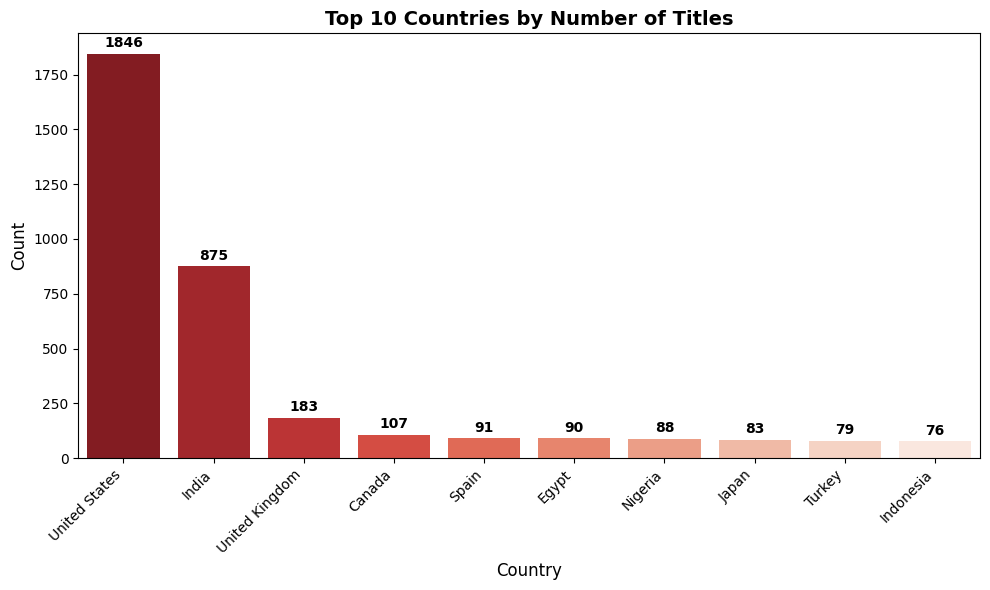

In [55]:
plt.figure(figsize=(10,6))
sns.barplot(
    x=df['country'].value_counts().head(10).index,
    y=df['country'].value_counts().head(10).values,
    palette='Reds_r'
)

plt.title("Top 10 Countries by Number of Titles", fontsize=14, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(df['country'].value_counts().head(10).values):
    plt.text(i, v + 30, str(v), ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

The USA leads Netflix’s content library with around 2500 titles, followed by India (1000) and the UK.

## Exploratory Data Analysis (Visualizations)

### Movies vs TV Shows count in USA According to Dataset

C:\Users\F M\AppData\Local\Temp\ipykernel_13588\3131967901.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


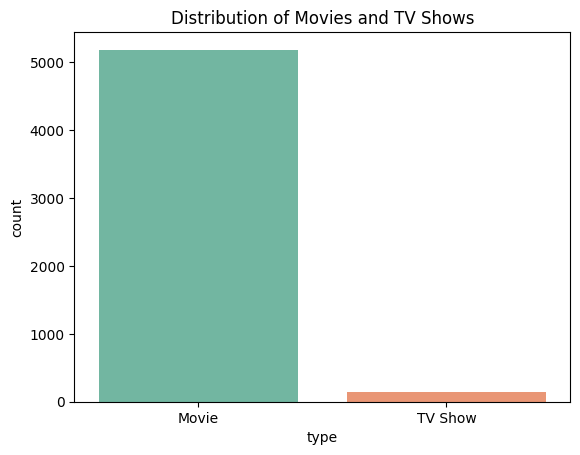

In [37]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Movies and TV Shows")
plt.show()

### Top Genres

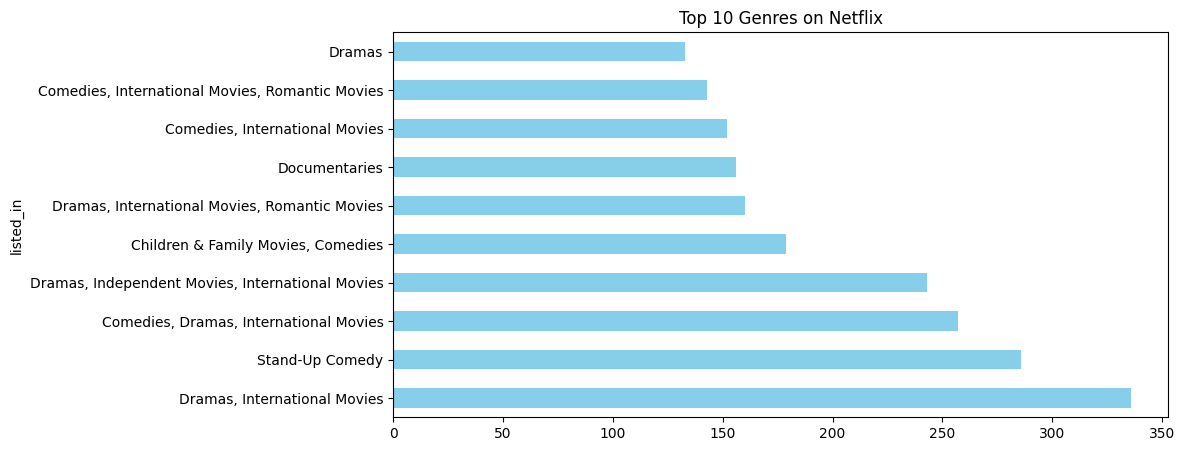

In [54]:
plt.figure(figsize=(10,5))
genres = df['listed_in'].str.split(',').explode().str.strip()
df['listed_in'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Genres on Netflix")
plt.show()

### Top 10 Directors

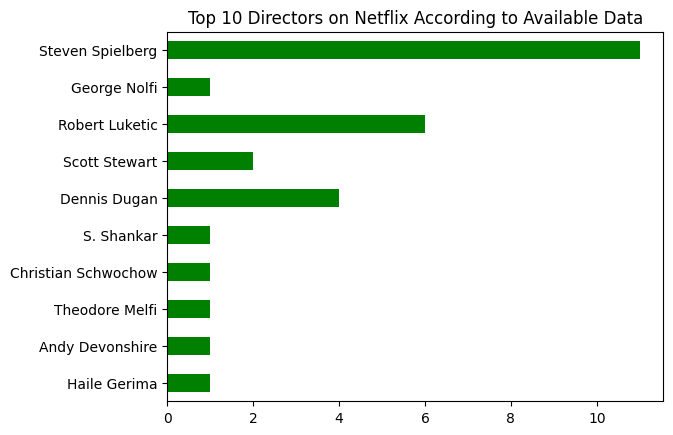

In [57]:
from collections import Counter
directors = df['director'].dropna().str.split(',').sum()
top_directors = pd.Series(Counter(directors)).head(10)
top_directors.plot(kind='barh', color='green')
plt.title("Top 10 Directors on Netflix According to Available Data")
plt.show()

### Ratings Distribution

C:\Users\F M\AppData\Local\Temp\ipykernel_13588\2913548964.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='coolwarm')


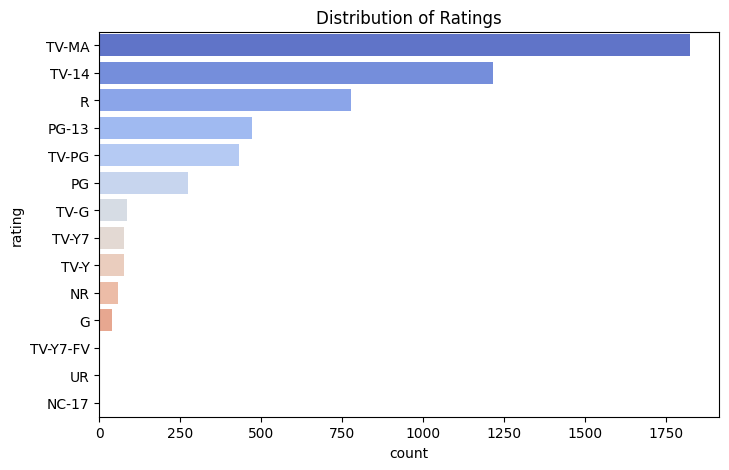

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Distribution of Ratings")
plt.show()

### Key Insights

- USA has the highest number of titles (~2500), followed by India (~1000) and the UK.
- Movies dominate Netflix’s global library.
- The most popular genres are International, Drama, Comedy, and Action & Adventure.
- The top director is Steven Spielberg.
- Most movies are rated TV-MA, followed by TV-14 and R.

## Conclusion

This analysis of Netflix data provided a clear view of how the platform’s content is distributed globally.  
It showed that the majority of titles originate from the USA, with India and the UK following closely.  
Movies dominate over TV shows, and the most frequent genres are International, Drama, and Comedy.  

Through this project, I gained hands-on experience in data cleaning, handling missing values, and visualizing large datasets using Python.  
Future improvements could include comparing multiple countries, analyzing trends over the years, or exploring correlations between genres and ratings.

In [43]:
df.to_csv("netflix_cleaned.csv", index=False)